In [1]:
import warnings
from importlib import reload
from functools import partial, lru_cache

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm, trange
from joblib import delayed
from modAL import batch
from art.metrics import empirical_robustness
from art.attacks.evasion import *
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from art.estimators.classification.scikitlearn import ScikitlearnSVC

from ipynb.fs.defs import Bias
from ipynb.fs.defs.Datasets import generateData_twoPills_2D, generateData_twoPills_noNoise_2D, plot_dataset_2D

import libactive
import libadversarial
from libactive import MyActiveLearner, active_split
from libadversarial import adversarial, uncertainty, random_batch
from libutil import ProgressParallel
from libdatasets import *
import librun
from librun import run

Using ThunderSVM


In [2]:
matrix = {
    # Dataset fetchers should cache if possible
    # Lambda wrapper required for function to be pickleable (sent to other threads via joblib)
    "datasets": [
        ("haberman", lambda: lru_cache()(haberman)())
    ],
    "dataset_mutators": {
        "none": (lambda *x: x),
    },
    "methods": [
        ("random", partial(random_batch, n_instances=10)),
        #("uncertainty", partial(batch.uncertainty_batch_sampling, n_instances=10)),
        #('fgm', partial(adversarial, Attack=partial(FastGradientMethod, minimal=True), n_instances=10)),
        #("deepfool", partial(adversarial, Attack=partial(DeepFool, verbose=False), n_instances=10)),
        #("hopskipjump", partial(adversarial, Attack=partial(HopSkipJump, verbose=False), n_instances=10)),
        # this one has to be re-run, n_instances was wrong
        #("bim", partial(adversarial, Attack=BasicIterativeMethod, n_instances=10)),
        #("pgd", partial(adversarial, Attack=partial(ProjectedGradientDescentNumpy, verbose=False), n_instances=10)),
        #("newtonfool", partial(adversarial, Attack=partial(NewtonFool, verbose=False), n_instances=10)),
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 0.1,
        "n_runs": 1
    }
}

In [5]:
results = librun.run(matrix, force_run=True)

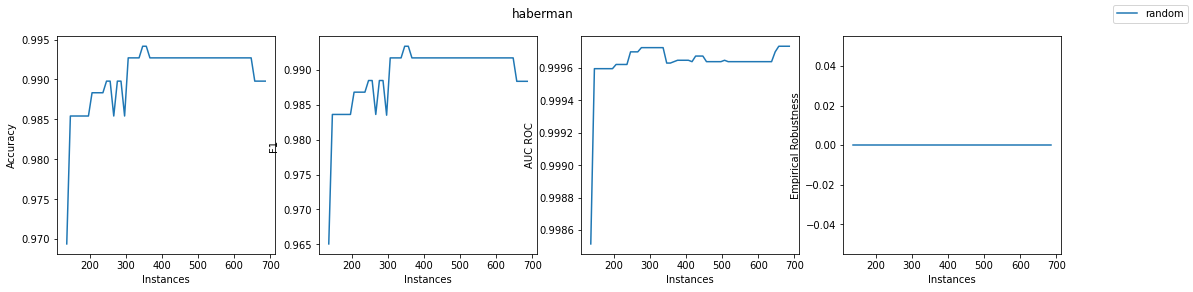

In [7]:
librun.plot(results, plot_robustness=True)

In [ ]:
librun.table(results)

In [3]:
import art; reload(art); from art.metrics import empirical_robustness

In [8]:
from thundersvm import SVC

X, y = haberman()
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = SVC(kernel='linear', probability=True)

clf.fit(X_train, y_train)

empirical_robustness(ScikitlearnSVC(clf), X_test, "fgsm", attack_params={"eps": 0.2})

[[-1.3768  11.043    2.7462  -2.7362 ]
 [-3.5203  -0.22691  2.7618  -0.64958]
 [-0.71718 10.1884   1.3804  -5.0263 ]
 ...
 [-1.2941   2.1072  -2.7237  -1.6453 ]
 [ 1.1297  -3.5971   4.8429  -0.0957 ]
 [-4.1297  -6.2816   9.8958  -1.2147 ]]


0.0

In [9]:
from sklearn.svm import SVC

X, y = haberman()
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = SVC(kernel='linear', probability=True)

clf.fit(X_train, y_train)

empirical_robustness(ScikitlearnSVC(clf), X_test, "fgsm", attack_params={"eps": 0.2})

[[-0.35355  -7.7233    6.9156    0.94394 ]
 [ 2.286    -1.19533   5.1404   -0.35475 ]
 [-0.2294    0.05307   0.244265  0.04395 ]
 ...
 [ 5.8919    2.7673   -1.5267    1.2551  ]
 [ 4.1848   -3.2729    2.8423    1.0741  ]
 [-0.73587  -4.9008    4.7367    1.5866  ]]


0.057900472740629455